In [ ]:
## Is it Messi?

In [ ]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [ ]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

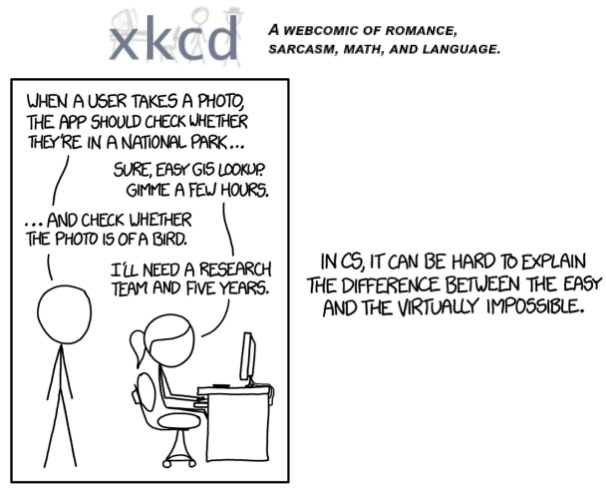

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "Lionel Messi"
1. Use DuckDuckGo to search for images of "soccer player"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of Messi and Soccer Player

In [1]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


/home/asthanaamish/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Let's start by searching for a bird photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [2]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('Lionel Messi', max_images=1)
urls[0]

Searching for 'Lionel Messi'


'https://i.pinimg.com/originals/57/85/05/578505cf1b2aa0f1f377da42b0253c69.jpg'

...and then download a URL and take a look at it:

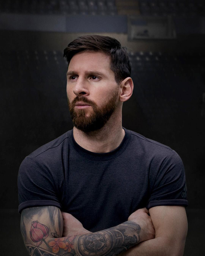

In [3]:
from fastdownload import download_url
dest = 'LionelMessi.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

Searching for 'soccer player'


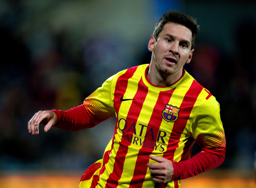

In [4]:
download_url(search_images('soccer player', max_images=1)[0], 'soccerPlayer.jpg', show_progress=False)
Image.open('soccerPlayer.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "Messi" and "Soccer Player" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [5]:
searches = 'soccer player','Lionel Messi'
path = Path('messi_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'soccer player photo'
Searching for 'soccer player sun photo'
Searching for 'soccer player shade photo'


/home/asthanaamish/miniconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'Lionel Messi photo'
Searching for 'Lionel Messi sun photo'
Searching for 'Lionel Messi shade photo'


In [6]:
print(path)
searches = 'soccer player','Lionel Messi'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

messi_or_not
soccer player
de3d0d98-9e17-4812-bafb-4376845d1692.jpg
35bf7749-c204-42c7-851c-f82c136cb0ab.jpg
7488f428-521f-4652-8278-6034d0d93d52.png
ac366fc9-18e1-405d-a854-094d61dd08c0.jpg
8a589aaf-6a78-4ee1-a5a3-73c6061c0f2c.jpeg
d444f1be-f8e8-4550-bfc2-26bdb5d5a0a2.jpg
ef8927b6-f1d2-4459-94fd-24b1f016845b.jpg
2ccd5379-7351-4c05-b4ba-e91d4793979f.jpg
6a619774-fadf-4e1b-a172-c60d2bc13ab6.jpg
1c31a5c1-ed12-40be-9931-70abfad2c115.jpg
3aba5f1f-a199-4156-898c-8874b1a53511.jpg
2d707ff5-ca4d-4eee-ae48-30e7b6c4afbc.jpg
e7b5b201-502e-40c6-a71d-f2c64527b007.jpg
6c0819f9-88be-423f-a528-1f8c0cb3b5b8.jpeg
006fc5a5-8fd5-4e52-9c2f-0d2416c0564e.jpg
0af70c5b-4a2b-433c-87f7-ee309a880f53.jpg
9e8553bf-6078-44af-94ea-869b7e180066.jpg
1ec76db9-4a3d-43b1-95e7-1f78017d4b17.jpg
04f19316-b675-48ad-ba8a-2e7fbebfb301.webp
7e4053c1-77e6-49d2-b112-fe63babf06e0.jpeg
b3a52535-2fcc-4b2a-895a-3450970a42f5.jpg
99d6529c-ae9e-4b07-96ab-a6e4ef83d337.jpg
6c3bc52c-1600-4c5e-8a83-896d83d8c6aa.jpg
22919216-42c3-43a0-a47e-e7

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

11

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

/home/asthanaamish/miniconda3/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


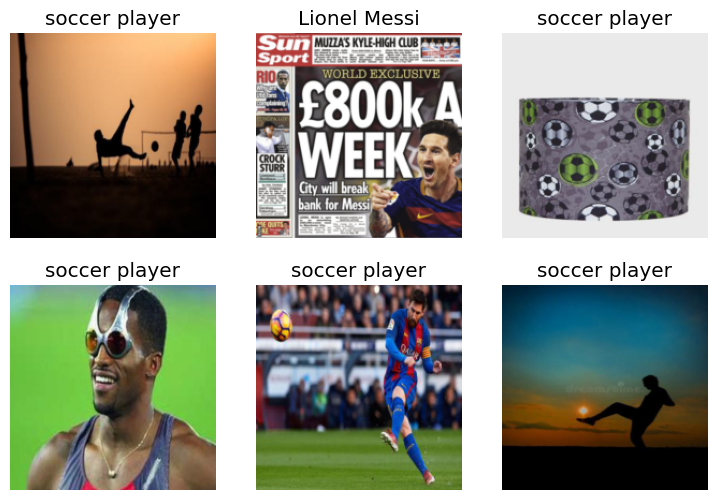

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "Messi" or "Soccer player").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *Messi* or *Soccer player*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.165258,0.896770,0.380952,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.886800,0.792990,0.333333,00:09
1,0.685820,0.540028,0.261905,00:09
2,0.515209,0.537754,0.190476,00:11
3,0.440403,0.452507,0.095238,00:11
4,0.352609,0.453434,0.095238,00:12
5,0.293181,0.439245,0.095238,00:12
6,0.249356,0.450102,0.142857,00:12
7,0.224462,0.470973,0.142857,00:11
8,0.199921,0.466697,0.166667,00:11
9,0.182892,0.461875,0.166667,00:11


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that Messi image we downloaded at the start:

In [10]:
is_messi,_,probs = learn.predict(PILImage.create('LionelMessi.jpg'))
print(f"This is a: {is_messi}.")
print(f"Probability it's messi: {probs[0]:.4f}")

This is a: Lionel Messi.
Probability it's messi: 1.0000


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.